<h2> Code-Beispiel: Gradientenabstiegsverfahren</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine implementierung des Gradientenabstiegsverfahrens. Im zweiten Code-Block können die Eingabeparameter geändert und das dazugehörige Ergebnis berechnet werden.</p>
<p style="text-align:justify">Dazu muss jedoch zuerst auch in den ersten Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden.</p>
</font>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Zielfunktion
def function(p, x):
    return p[2] - math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)
    
    
# Partielle Ableitungen der Zielfunktion
def f_par_deriv_z1(p, x):
    return -(p[0]-x[0]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_z2(p, x):
    return -(p[1]-x[1]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_R(p,x):
    return 1

nabla_function = [f_par_deriv_z1, f_par_deriv_z2, f_par_deriv_R]


# Berechnen der Jakobi Matrix
def jacobian(p, points, nabla_f):
    rows = np.shape(points)[0] 
    cols = np.shape(p)[0]
    J = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            J[row][col] = nabla_f[col](p, points[row])
    return J


# Berechnen des Residual
def residual(p, points):
    rows = np.shape(points)[0]
    # Residual Vektor initialisieren
    r = np.zeros(rows)
    for row in range(rows):
        r[row] = function(p, points[row])
    return r


# Gradientenabstiegsverfahren mit festem gamma
def Gradientenabstieg_festesGamma(nabla_f, p0, x, gamma):
    # Residual und Parameter initialisieren
    r = residual(p0, x)
    p = p0
    
    # Abbruchbedingungen
    MAX_ITER = 1000
    last_r = r
    MIN_DELTA = 0.000001
    EPSILON = 0.000001
    
    i=0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)
        
        # neue Jakobi Matrix berechnen
        J = jacobian(p, x, nabla_f)
        Jt = np.matrix.transpose(J)
        
        # Parameter aktualisieren
        p = p - gamma*(np.dot(Jt, r))
        
        # Residual aktualisieren
        r = residual(p, x)
        
        #Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or np.linalg.norm(r - last_r) < MIN_DELTA:
            break
            
        last_r = r
        
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret
    
    
# Gradientenabstiegsverfahren mit angepasstem gamma mithilfe der Barzilai-Borwein Methode
def Gradientenabstieg(nabla_f, p0, x, gamma):
    # Residual und Parameter initialisieren
    r = residual(p0, x)
    p = p0
    J = jacobian(p, x, nabla_f)
    Jt = np.matrix.transpose(J)
    c_gradient = np.dot(Jt, r)
    
    # Abbruchbedingungen
    MAX_ITER = 1000
    last_r = r
    MIN_DELTA = 0.000001
    EPSILON = 0.000001
    
    i=0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)

        # Parameter aktualisieren
        last_p = p
        p = p - gamma*c_gradient
        print(gamma)
        # Residual aktualisieren
        r = residual(p, x)
        
        # Jakobi Matrix aktualisieren
        J = jacobian(p, x, nabla_f)
        Jt = np.matrix.transpose(J)
        last_c_gradient = c_gradient
        c_gradient = np.dot(Jt, r)
        
        # Gamma aktualisieren
        delta_p = p - last_p
        delta_c_gradient = c_gradient - last_c_gradient
        norm_delta_c_gradient = np.linalg.norm(delta_c_gradient)
        if norm_delta_c_gradient != 0:
            gamma = np.absolute(np.dot(delta_p, delta_c_gradient)) / norm_delta_c_gradient**2
            
        #Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or np.linalg.norm(r - last_r) < MIN_DELTA:
            break
            
        last_r = r
    
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret
            

# Funktion um verrauschte Messpunkte zu generieren
def getPoints(x, std, R, z_eins, z_zwei):
    for i in range(np.size(x,0)):
        x[i][1] = (- math.sqrt(R**2 - (z_eins - x[i][0])**2) + z_zwei) + np.random.normal(0, std) 
    return x


<font size="3" face="Verdana">
<p style="text-align:justify">Die Startparameter, Gamma und die Messpunkte können beliebig geändert werden. Ebenso die Art des Verfahrens (mit oder ohne festes Gamma). Zum Ausführen des Codes muss zunächst in das Feld mit dem Code geklickt werden und dann in der Leiste oben auf "Run".</p>

Messpunkte:
( -1 , 2.053285104318418 )
( 0 , -0.15475529827448745 )
( 2 , -1.1963883897745062 )
( 2.5 , -1.0696186386542905 )
( 3 , -0.5385996764537189 )
( 4 , -0.22052291322743797 )
Kreis durch die gegebenen Punkte:


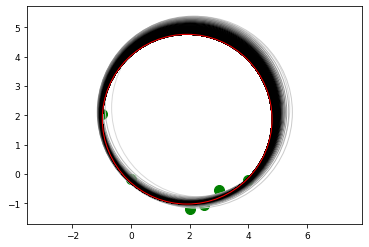

Parameter:
z1:  1.9188166274382032
z2:  1.8683262136276977
R:  2.8934887778378973
Anzahl der Interationen: 208


In [4]:
########################################################################
# Startparameter (z1, z2, R)
p0 = [2.3794, 2.2532, 3.0370]

# Schrittweite
gamma = 0.2

# Messpunkte: x Werte gegeben, y Werte werden mit get Points berechnet und mit einer Gaußschen Normalverteilung verrauscht
#(0 = kein Rauschen)
# getPoionts(Messpunkte, Standardabweichung, Radius, z1, z2)
# getPoionts([[x1, 0], [x2, 0], [x3, 0], ... , Standardabweichung, Radius, z1, z2)
x = getPoints([[-1, 0], [0, 0], [2, 0], [2.5, 0], [3, 0], [4, 0]], 0.1, 3, 2, 2)
    
# Gradientenabstiegsverfahren anwenden (Verfahren kann gewechselt werden, indem das jeweils ander auskommentiert wird)
#festes Gamma:
res = Gradientenabstieg_festesGamma(nabla_function, p0, x, gamma)
#dynamisches Gamma:
#res = Gradientenabstieg(nabla_function, p0, x, gamma)

########################################################################

# Messpunkte anzeigen
print("Messpunkte:")
for i in range(np.shape(x)[0]):
    print("(" , x[i][0] , "," , x[i][1] , ")")
for i in range(np.shape(x)[0]):
    plt.scatter(x[i][0], x[i][1], s=100, facecolors='g', edgecolors='g')

# den letzten Kreis in rot darstellen
circle = plt.Circle((res[0][0], res[0][1]), radius=res[0][2], fc='none', ec='r')
plt.gca().add_patch(circle)

# Schaubild anzeigen
print("Kreis durch die gegebenen Punkte:")
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()

# Resultate anzeigen
print("Parameter:")
print("z1: ", res[0][0])
print("z2: ", res[0][1])
print("R: ", res[0][2])
print("Anzahl der Interationen:", res[1])